<a href="https://colab.research.google.com/github/dianelnursa/KECERDASAN_BUATAN/blob/main/Data%20Mining/Seleksi_Fitur_Dian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
diabetes = pd.read_csv('/content/drive/MyDrive/KULIAH/diabetes.csv')
print (diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB




PROSES SELEKSI FITUR

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = diabetes.iloc[:,0:20]
y = diabetes.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Monitoring', 'Angka']
print(featureScores.nlargest(9,'Angka'))

                 Monitoring        Angka
4                   Insulin  2175.565273
1                   Glucose  1411.887041
8                   Outcome   500.000000
7                       Age   181.303689
5                       BMI   127.669343
0               Pregnancies   111.519691
3             SkinThickness    53.108040
2             BloodPressure    17.605373
6  DiabetesPedigreeFunction     5.392682


In [ ]:
import matplotlib.pyplot as plt

[0.00840901 0.04039347 0.00351211 0.00271763 0.00419328 0.01058934
 0.00463912 0.01207227 0.91347377]


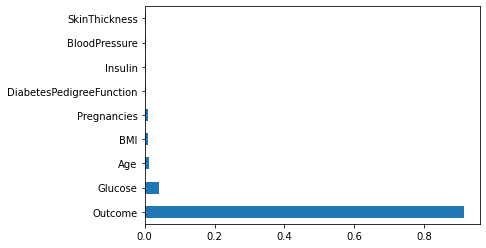

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
X = diabetes.iloc[:,0:20]
y = diabetes.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
import seaborn as sns

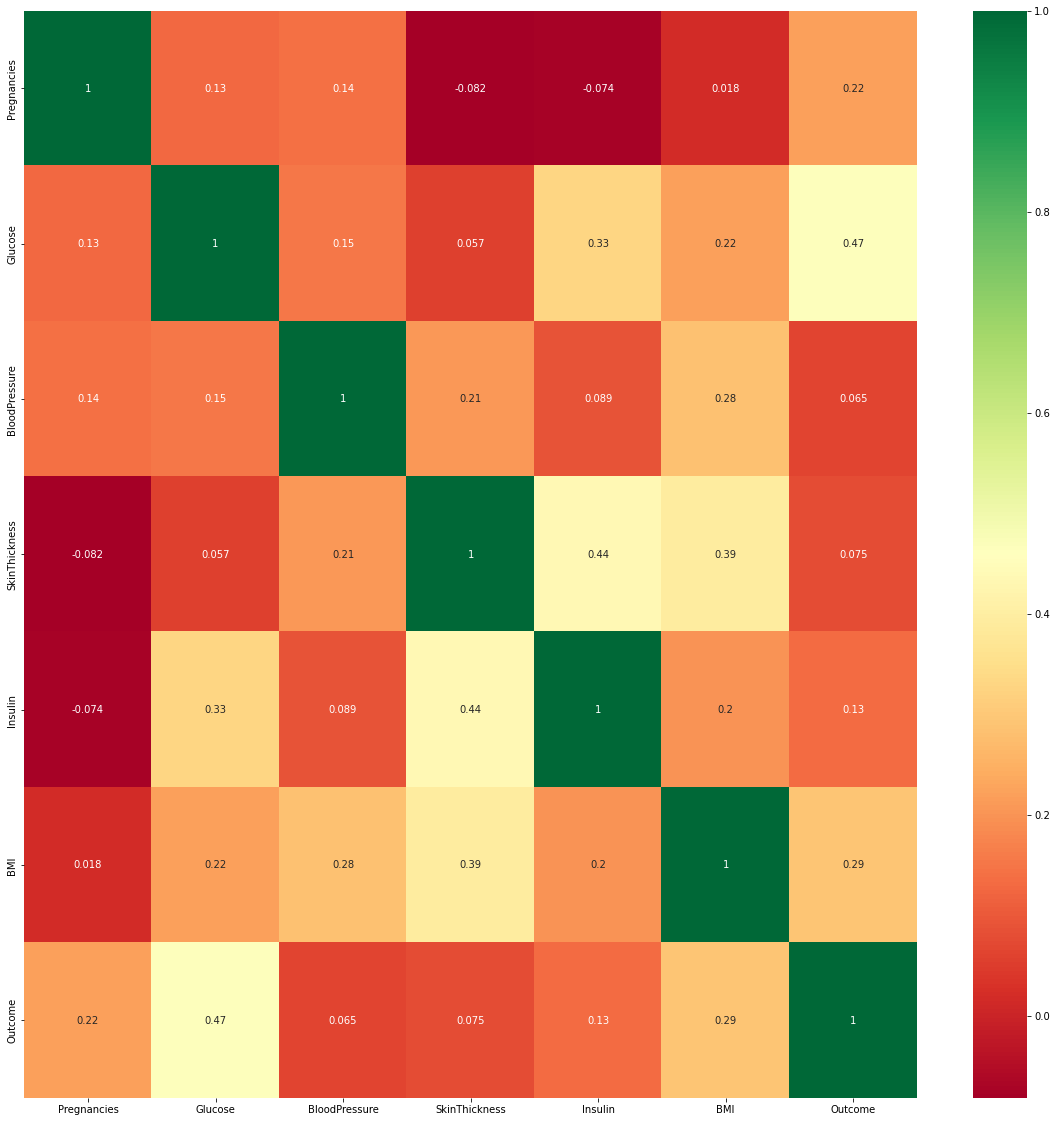

In [ ]:
X = diabetes.iloc[:,0:20]
y = diabetes.iloc[:,-1]

corrmat = diabetes.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(diabetes[top_corr_features].corr(), annot=True, cmap="RdYlGn")

DATA CLEANING

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
0,6,148,72,35,0,33.6,1
1,1,85,66,29,0,26.6,0
2,8,183,64,0,0,23.3,1
3,1,89,66,23,94,28.1,0
4,0,137,40,35,168,43.1,1


In [ ]:
to_drop = ['DiabetesPedigreeFunction', 
            'Age']

diabetes.drop(to_drop, inplace=True, axis=1)

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
0,6,148,72,35,0,33.6,1
1,1,85,66,29,0,26.6,0
2,8,183,64,0,0,23.3,1
3,1,89,66,23,94,28.1,0
4,0,137,40,35,168,43.1,1


In [ ]:
diabetes.loc[206]

Pregnancies        8.0
Glucose          196.0
BloodPressure     76.0
SkinThickness     29.0
Insulin          280.0
BMI               37.5
Outcome            1.0
Name: 206, dtype: float64

In [ ]:
diabetes.iloc[206]

Pregnancies        8.0
Glucose          196.0
BloodPressure     76.0
SkinThickness     29.0
Insulin          280.0
BMI               37.5
Outcome            1.0
Name: 206, dtype: float64